# DataMinds: Machine Learning Project

---

The group developed a project for predicting students final year grade based on demographic features in portugal. The ability to predict student performance is critical for educational institutions to identify at-risk students early and deploy targeted interventions.
The dataset was obtained from **UCI Machine Learning Repository** and can be access with the link [Student Performance Dataset (UCI)](https://archive.ics.uci.edu/dataset/320/student+performance)
This data was gathered by researches who wanted to study the reasons for the poor peformance of portugal highschools.
Researchers from UCI collected data from students in ***Gabriel Pereira*** and ***Mousinho da Silveira*** high schools in the region of Alentejo in Portugal.
This dataset was considered for the project due to high likehood of imbalance in the target variable. it is almost impossible for half of enrolled students to fail a class and in most cases about 10 to 15 percent of enrolled students might fail signfiying the possiblity of imbalance

__the table below shows the students name and id numbers__
|No | Name                     | Student Id|
|-- |--------------------------|-----------|
|1. |Margaret Naa Dei Neequaye | 22425065  |
|2. |⁠Kelvin Addae Kwarteng     | 22427564  |
|3. |⁠Atidzah Godfred Kodzo     | 22427528  |
|4. |⁠Eugene Agbovie            | 22424943  |
|5. |Adiboye Philip            | 22427838  |
|6. |⁠Erica Karl Bentum         | 22425061  |
|7. |⁠Prince Nana Yaw Twieku    | 22425155  |
|8. |Jennifer Oppong           | 22425191  |
|9. |⁠Aseye Gbagbo              | 22424344  |
|10. |⁠Michael Kusi-Appiah      | 22424580  |
|11. |Myrielle Hounsinou       | 22424167  |

---

Importing Libraries and setting up the project

In [1]:
print("="*50)
print("Importing Libraries for the project")
print("="*50)

#Import packages
import pandas as pd #for data_analysis
import matplotlib.pyplot as plt #used in conjuction with seaborn to create plots and charts
import seaborn as sns  #used in conjuction with matplotlib to create plots and charts
#%matplotlib inline  #to ensure that charts are rendered in the juypeter notebook file

#Setting to enable preview of all columns
pd.set_option('display.max_columns', None)

#machine learning packages
from sklearn.model_selection import train_test_split #for splitting data into training and test set
#from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix #metrics for evaluating models
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder #for further preprocessing
from sklearn.compose import ColumnTransformer # to create pipelines for preprocessing
from sklearn.pipeline import Pipeline #to create pipeline to preprocess and build models

Importing Libraries for the project


---
Definitions of all functions used globally in the project

In [2]:
#Function Definitions
#Function to encode signals
def encode(feature, code):
    '''encodes categories in a feature
    
    Args:
        feature(str): a string or list of strings of features to encode
        code(dictionary): a dictionary to encode the categories of the feature
            the dictionary should be of the form {'old_category': 'new_category'}
    
    Returns:
        A pandas series of with the new categories'''

    return data[feature].map(code)

#Function to classify scores as pass or fail
def transform_grade(x):
    '''Classify students grade into pass or failure
    
    Args:
        x(int or float): student grade to classify
        
    
    Returns:
        1 for passing the class 0 for failing the class'''
    if x > 9:
        return 1
    else:
        return 0

#function to Creat Graph for Dataseries
def create_bar_graph(data_series):
  sns.catplot(data=data_series.to_frame(), x='final_grade', kind='count')
  plt.title("Distribution of Final Grade in Training Data")
  plt.show()

#Function to Generate Table and Graph for minority and majority class in target
def check_balance(data_series):
  a = data_series.value_counts()
  a.name = 'Figure'
  pec = (a*100 / len(data_series)).round(2)
  pec.name = 'percentage'
  a = pd.concat([a,pec], axis=1)
  display(a)
  create_bar_graph(data_series)

#Function to get classifcation report in a Dataframe
def get_report(test, prediction):
    report_dict = classification_report(test, prediction, output_dict=True, target_names=['Fail','Pass'])
    return pd.DataFrame(report_dict).transpose()


In [3]:
#URL to raw_file hosted on github
file_url = r"https://raw.githubusercontent.com/AdiBoye/ml_capstone/refs/heads/main/student-por.csv"

print("="*105)
print(f"Loading Dataset from {file_url}")
print("="*105)

#Load Dataset
df = pd.read_csv(file_url, sep=';')

print(f"Dataset Shape: {df.shape}")
print(f"Total Participants: {len(df)}")

#preview Data
print("="*30)
print("PREVIEW 10 ROWS OF DATASET")
print("="*30)
#create local copy for data roll bak
data = df.copy()
display(data.head(10))

Loading Dataset from https://raw.githubusercontent.com/AdiBoye/ml_capstone/refs/heads/main/student-por.csv
Dataset Shape: (649, 33)
Total Participants: 649
PREVIEW 10 ROWS OF DATASET


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


### Data Preparation (Preprocessing and Inspection)
---
__Table of Features and Description__
 **No**|**data Label** | **description** | **updated_data label** |**data type**
---|-------|-------------|-------------------|----------
1.|school|student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)|school|nominal
2.|sex|student's sex (binary: 'F' - female or 'M' - male)	|sex|nominal
3.|age|student's age (numeric: from 15 to 22)|age|discrete
4.|address|student's home address type (binary: 'U' - urban or 'R' - rural)|locality_type|nominal
5.|famsize|family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|family_size|ordinal
6.|Pstatus|parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|parents_living_status|nominal
7.|Medu|mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)	|mother_education|ordinal
8.|edu|father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)	|father_education|ordinal
9.|Mjob|mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|mothers_job|nominal
10.|Fjob|father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|father_job|nominal
11.|reason|reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')|reason_for_selection|nominal
12.|guardian|student's guardian (nominal: 'mother', 'father' or 'other')|guardian|nominal
13.|traveltime|home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)	|commute_to_school|ordinal
14.|studytime|study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)	|weekly_study_time|ordinal
15.|failures|number of past class failures|failed_past_classes|discrete
16.|schoolsup|extra educational support (binary: yes or no)|extra_education_support|nominal
17.|famsup|family educational support (binary: yes or no)|family_educational_support|nominal
18.|paid|extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)	|extra_paid_class|nominal
19.|activities|extra-curricular activities (binary: yes or no)|extra_curricular_activities|nominal
20.|nursery|attended nursery school (binary: yes or no)	|attended_nursery|nominal
21.|higher|attended nursery school (binary: yes or no)|undertake_higher_education|nominal
22.|internet|Internet access at home (binary: yes or no)|internet|nominal
23.|romantic|with a romantic relationship (binary: yes or no)|romantic_relationship|nominal
24.|famrel|quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|family_relationship|ordinal
25.|freetime|free time after school (numeric: from 1 - very low to 5 - very high)|after_school_time|ordinal
26.|gout|going out with friends (numeric: from 1 - very low to 5 - very high)|go_out_with_friends|ordinal
27.|Dalc|workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|work_day_alcohol_consumption|ordinal
28.|Walc|weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|weekend+alchohol_consumption|ordinal
29.|health|current health status (numeric: from 1 - very bad to 5 - very good)|health_status|ordinal
30.|abscences|number of school absences (numeric: from 0 to 93)|discrete|
31.|G1|first period grade (numeric: from 0 to 20)|first_peroid_grade|discrete
32.|G2|second period grade (numeric: from 0 to 20)|second_period_grade|discrete
33.|G3|final grade (numeric: from 0 to 20, output target)|final_grade|discrete

---
updating feature or column names

In [4]:
#Dictionary of old column names and the new names for replacement
columns_new_name = {
   'address': 'locality_type',
   'famsize': 'family_size',
   'Pstatus': 'parents_living_status',
   'Medu': 'mothers_education',
   'Fedu': 'fathers_education',
   'Mjob': 'mothers_job',
   'Fjob': 'fathers_job',
   'reason': 'reason_for_selection',
   'traveltime': 'commute_to_school',
   'failures': 'failed_passed_courses',
   'schoolsup': 'extra_education_support',
   'famsup': 'extra_family_support',
   'paid': 'extra_paid_class',
   'activities': 'extra_curricular_activities',
   'nursery': 'attended_nursery',
   'higher': 'undertake_higher_education',
   'romantic': 'romantic_relationship',
   'famrel': 'family_relationship',
   'freetime':'after_school_time',
   'goout': 'go_out_with_friends',
   'Dalc': 'workday_alcohol_consumption',
   'Walc': 'weekend_alchohol_consumption',
   'health': 'health_status',
   'G1': 'first_peroid_grade',
   'G2': 'second_peroid_grade',
   'G3': 'final_grade'
}

print("="*30)
print("Updating Column Names")
print("="*30)

#replace column name
df.rename(columns=columns_new_name, inplace=True)
#preview dataset
print('Preview of new dataframe')
display(df.head(10))

Updating Column Names
Preview of new dataframe


,school,sex,age,locality_type,family_size,parents_living_status,mothers_education,fathers_education,mothers_job,fathers_job,reason_for_selection,guardian,commute_to_school,studytime,failed_passed_courses,extra_education_support,extra_family_support,extra_paid_class,extra_curricular_activities,attended_nursery,undertake_higher_education,internet,romantic_relationship,family_relationship,after_school_time,go_out_with_friends,workday_alcohol_consumption,weekend_alchohol_consumption,health_status,absences,first_peroid_grade,second_peroid_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


---
Checking for duplicates and missing data

In [5]:
#create a copy of data for rollback
data = df.copy()


print("="*30)
print("Checking for duplicates and Missing data")
print("="*30)


#Check for duplicates
print(f"Duplicated Records: {data.duplicated().sum()}\n")

#Check for missing values
missing_value_count = data.isnull().sum() #get count of missing values
missing_value_count.name = 'missing_values' #update column name to missing value
missing_value_percentage = (missing_value_count*100 / len(data)).round(2) #Calculate the percentage of missing from total data length
missing_value_percentage.name = 'percentage' #update column name to percentage
missing_value_count = pd.concat([missing_value_count,missing_value_percentage], axis=1) #append missing values and percentage series side by side

#display Calculated table
display(missing_value_count)

Checking for duplicates and Missing data
Duplicated Records: 0



,missing_values,percentage
school,0,0.0
sex,0,0.0
age,0,0.0
locality_type,0,0.0
family_size,0,0.0
parents_living_status,0,0.0
mothers_education,0,0.0
fathers_education,0,0.0
mothers_job,0,0.0
fathers_job,0,0.0


---
There was no duplicated records and missing Data
#insert meme later

---
Inspecting dataset for inconsistent datatypes in columns

In [6]:
#Checking Data type of datasets
print("="*30)
print("Column Data Types")
print("="*30)
data.info()

#Inspect data values for inconsistent types
print("="*30)
print("Unique Values per each column")
print("="*30)
data.columns
for i in data.columns:
    print(f"{i}: {data[i].sort_values().unique().tolist()}") 

Column Data Types
<class 'pandas.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   school                        649 non-null    str  
 1   sex                           649 non-null    str  
 2   age                           649 non-null    int64
 3   locality_type                 649 non-null    str  
 4   family_size                   649 non-null    str  
 5   parents_living_status         649 non-null    str  
 6   mothers_education             649 non-null    int64
 7   fathers_education             649 non-null    int64
 8   mothers_job                   649 non-null    str  
 9   fathers_job                   649 non-null    str  
 10  reason_for_selection          649 non-null    str  
 11  guardian                      649 non-null    str  
 12  commute_to_school             649 non-null    int64
 13  studytime                   

---


### Exploratory Data Analysis
---


In [7]:
#Group Features by data type
categorical_features = list(data.select_dtypes(include=['object','str']).columns) #list of categorical features
numerical_features = list(data.select_dtypes(include='number').columns) #list of numberical feature

#Get descriptive statistics of feature
print("="*43)
print("Descriptive Statistics of features")
print("="*43)
display(data.describe(include=['object', 'str', 'number']).round(2))

Descriptive Statistics of features


,school,sex,age,locality_type,family_size,parents_living_status,mothers_education,fathers_education,mothers_job,fathers_job,reason_for_selection,guardian,commute_to_school,studytime,failed_passed_courses,extra_education_support,extra_family_support,extra_paid_class,extra_curricular_activities,attended_nursery,undertake_higher_education,internet,romantic_relationship,family_relationship,after_school_time,go_out_with_friends,workday_alcohol_consumption,weekend_alchohol_consumption,health_status,absences,first_peroid_grade,second_peroid_grade,final_grade
count,649,649,649.00,649,649,649,649.00,649.00,649,649,649,649,649.00,649.00,649.00,649,649,649,649,649,649,649,649,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,285,455,NaN,NaN,NaN,581,398,610,334,521,580,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.74,NaN,NaN,NaN,2.51,2.31,NaN,NaN,NaN,NaN,1.57,1.93,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,NaN,NaN,1.22,NaN,NaN,NaN,1.13,1.10,NaN,NaN,NaN,NaN,0.75,0.83,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,NaN,NaN,15.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,1.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,16.00,NaN,NaN,NaN,2.00,1.00,NaN,NaN,NaN,NaN,1.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,NaN,NaN,17.00,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,NaN,1.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,NaN,NaN,18.00,NaN,NaN,NaN,4.00,3.00,NaN,NaN,NaN,NaN,2.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00


---
Plotting Distribution of Categorical Features

Distribution of Categorical Features


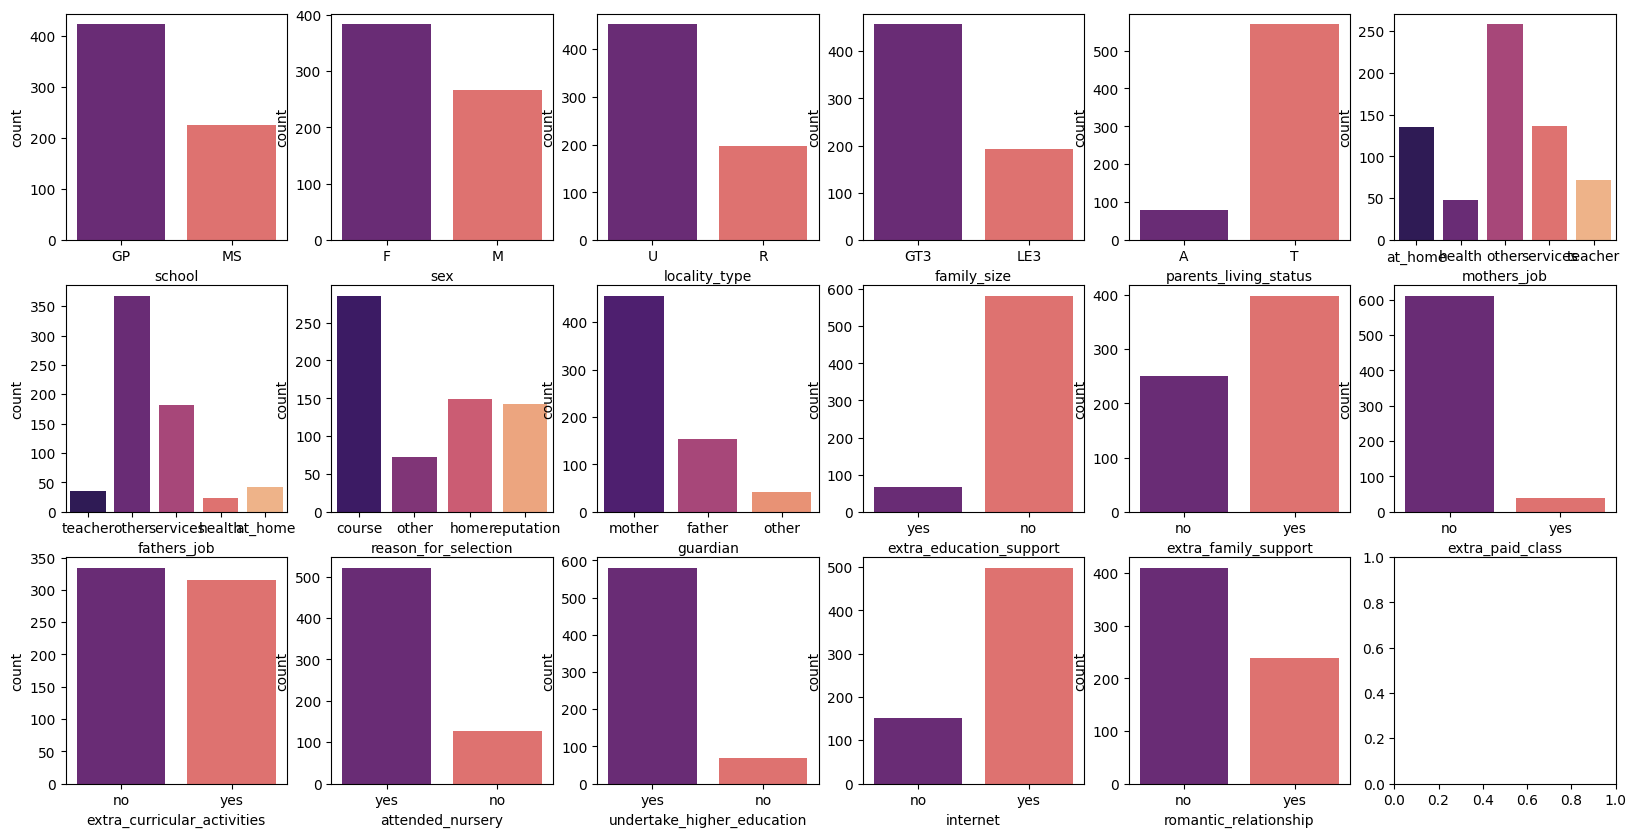

In [8]:
print("="*40)
print("Distribution of Categorical Features")
print("="*40)

#Plots Categorical features using Barcharts
fig, ax = plt.subplots((len(categorical_features) // 6) + 1,6, figsize=(20,10))
for i in range(len(categorical_features)):
  c_axes = ax.flat[i]
  sns.countplot(data=data, x=categorical_features[i], ax=c_axes, hue= categorical_features[i], palette='magma')

plt.show()

---
Plotting of Numerical Features

Distribution of Numerical Feature


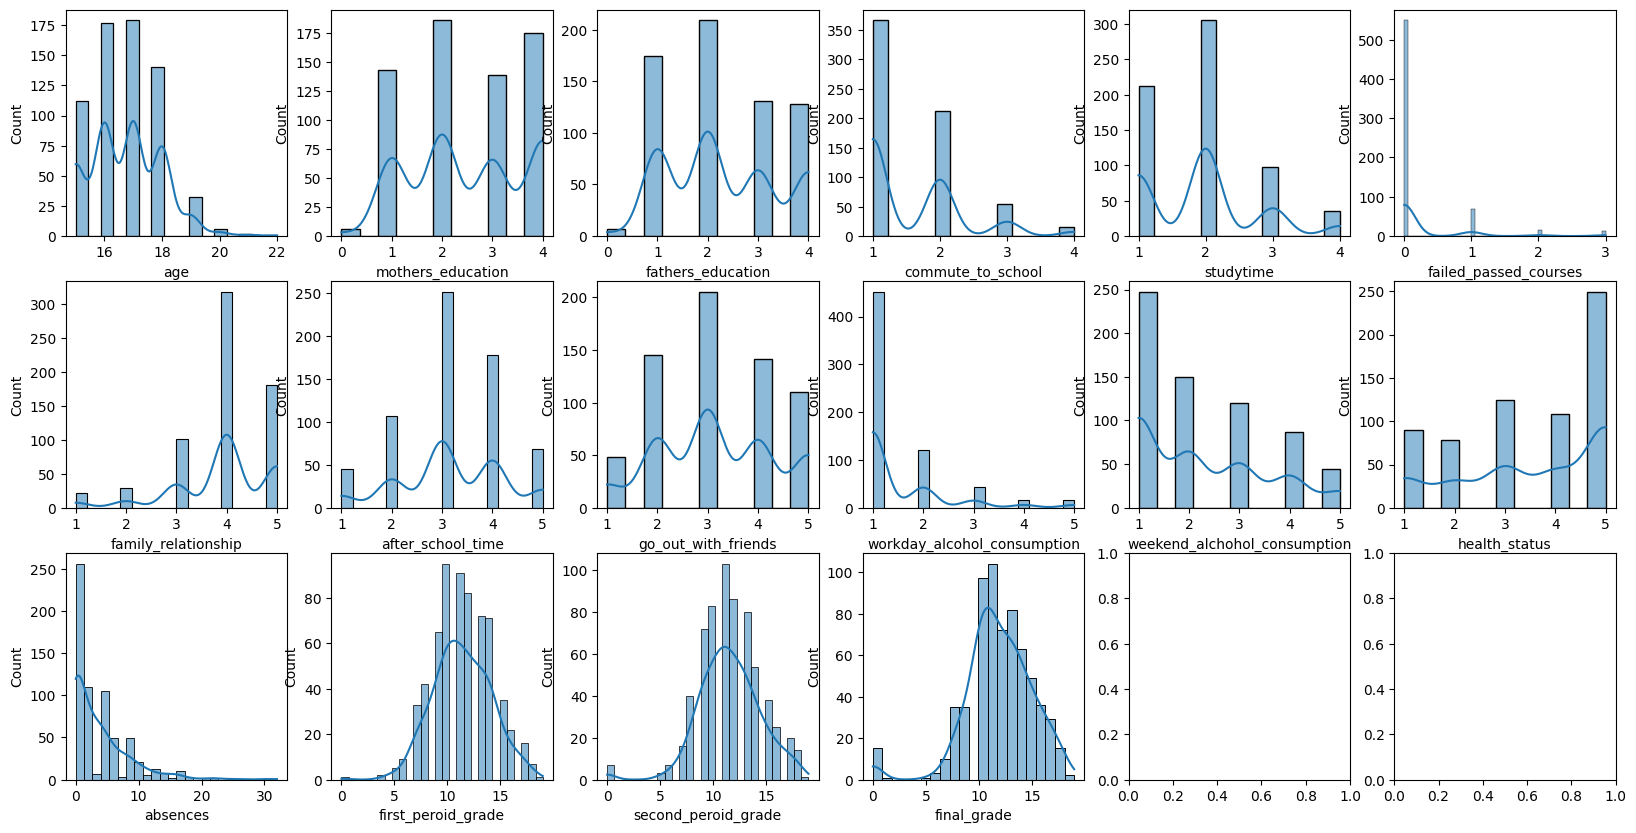

In [9]:
print("="*40)
print("Distribution of Numerical Feature")
print("="*40)
#Plots Numerical features using histogram
fig, ax = plt.subplots((len(numerical_features) // 6) + 1,6, figsize=(20,10)) #Creating subplots on one figure
for i in range(len(numerical_features)): #iterating over axes in the figure
  c_axes = ax.flat[i]
  sns.histplot(data=data, x=numerical_features[i], ax=c_axes, kde=True)

plt.show()

---

Label Encoding of Binary and Ordinal features


In [10]:
'''Label Encoding of Binary and Ordinal features
   Did not use any encoding methods since we want full control
'''
print("="*40)
print("Encoding of binary and ordinal features")
print("="*40)
#Definition of label codes
school = {'GP':0, 'MS':1} #codes for sschool
sex = {'F':0, 'M':1} #codes for sex
local = {'U':0, 'R':1} #codes for local
fam = {'LE3':0, 'GT3':1} #codes for family size
pt_liv = {'A':0, 'T':1} #codes for living with parents
decision = {'no': 0, 'yes': 1} #codes to encode any yes or no question

#performing Encoding with the codes defined above
data['school'] = encode('school', school)
data['sex'] = encode('sex', sex)
data['locality_type'] = encode('locality_type', local)
data['family_size'] = encode('family_size', fam)
data['parents_living_status'] = encode('parents_living_status', pt_liv)
data['extra_education_support'] = encode('extra_education_support', decision)
data['extra_family_support'] = encode('extra_family_support', decision)
data['extra_paid_class'] = encode('extra_paid_class', decision)
data['extra_curricular_activities'] = encode('extra_curricular_activities', decision)
data['attended_nursery'] = encode('attended_nursery', decision)
data['undertake_higher_education'] = encode('undertake_higher_education', decision)
data['internet'] = encode('internet', decision)
data['romantic_relationship'] = encode('romantic_relationship', decision)

#Preview Data
for i in data.columns:
  print(f"{i}: {data[i].sort_values().unique().tolist()}")

Encoding of binary and ordinal features
school: [0, 1]
sex: [0, 1]
age: [15, 16, 17, 18, 19, 20, 21, 22]
locality_type: [0, 1]
family_size: [0, 1]
parents_living_status: [0, 1]
mothers_education: [0, 1, 2, 3, 4]
fathers_education: [0, 1, 2, 3, 4]
mothers_job: ['at_home', 'health', 'other', 'services', 'teacher']
fathers_job: ['at_home', 'health', 'other', 'services', 'teacher']
reason_for_selection: ['course', 'home', 'other', 'reputation']
guardian: ['father', 'mother', 'other']
commute_to_school: [1, 2, 3, 4]
studytime: [1, 2, 3, 4]
failed_passed_courses: [0, 1, 2, 3]
extra_education_support: [0, 1]
extra_family_support: [0, 1]
extra_paid_class: [0, 1]
extra_curricular_activities: [0, 1]
attended_nursery: [0, 1]
undertake_higher_education: [0, 1]
internet: [0, 1]
romantic_relationship: [0, 1]
family_relationship: [1, 2, 3, 4, 5]
after_school_time: [1, 2, 3, 4, 5]
go_out_with_friends: [1, 2, 3, 4, 5]
workday_alcohol_consumption: [1, 2, 3, 4, 5]
weekend_alchohol_consumption: [1, 2, 3, 

---
Checking for Outliers and errors in data

In [11]:
#Update list of categorical and numeric features
categorical_features = list(data.select_dtypes(include=['object','str']).columns) #list of categorical features
numerical_features = list(data.select_dtypes(include='number').columns) #list of numerical features
print("="*40)
print("Checking for Outlier and errors in data")
print("="*40)
print(f"Length of categorical data attributes: {len(categorical_features)}")
print(f"Length of numerical data attributes: {len(numerical_features)}")

Checking for Outlier and errors in data
Length of categorical data attributes: 4
Length of numerical data attributes: 29


---


Box Plots for numerical values


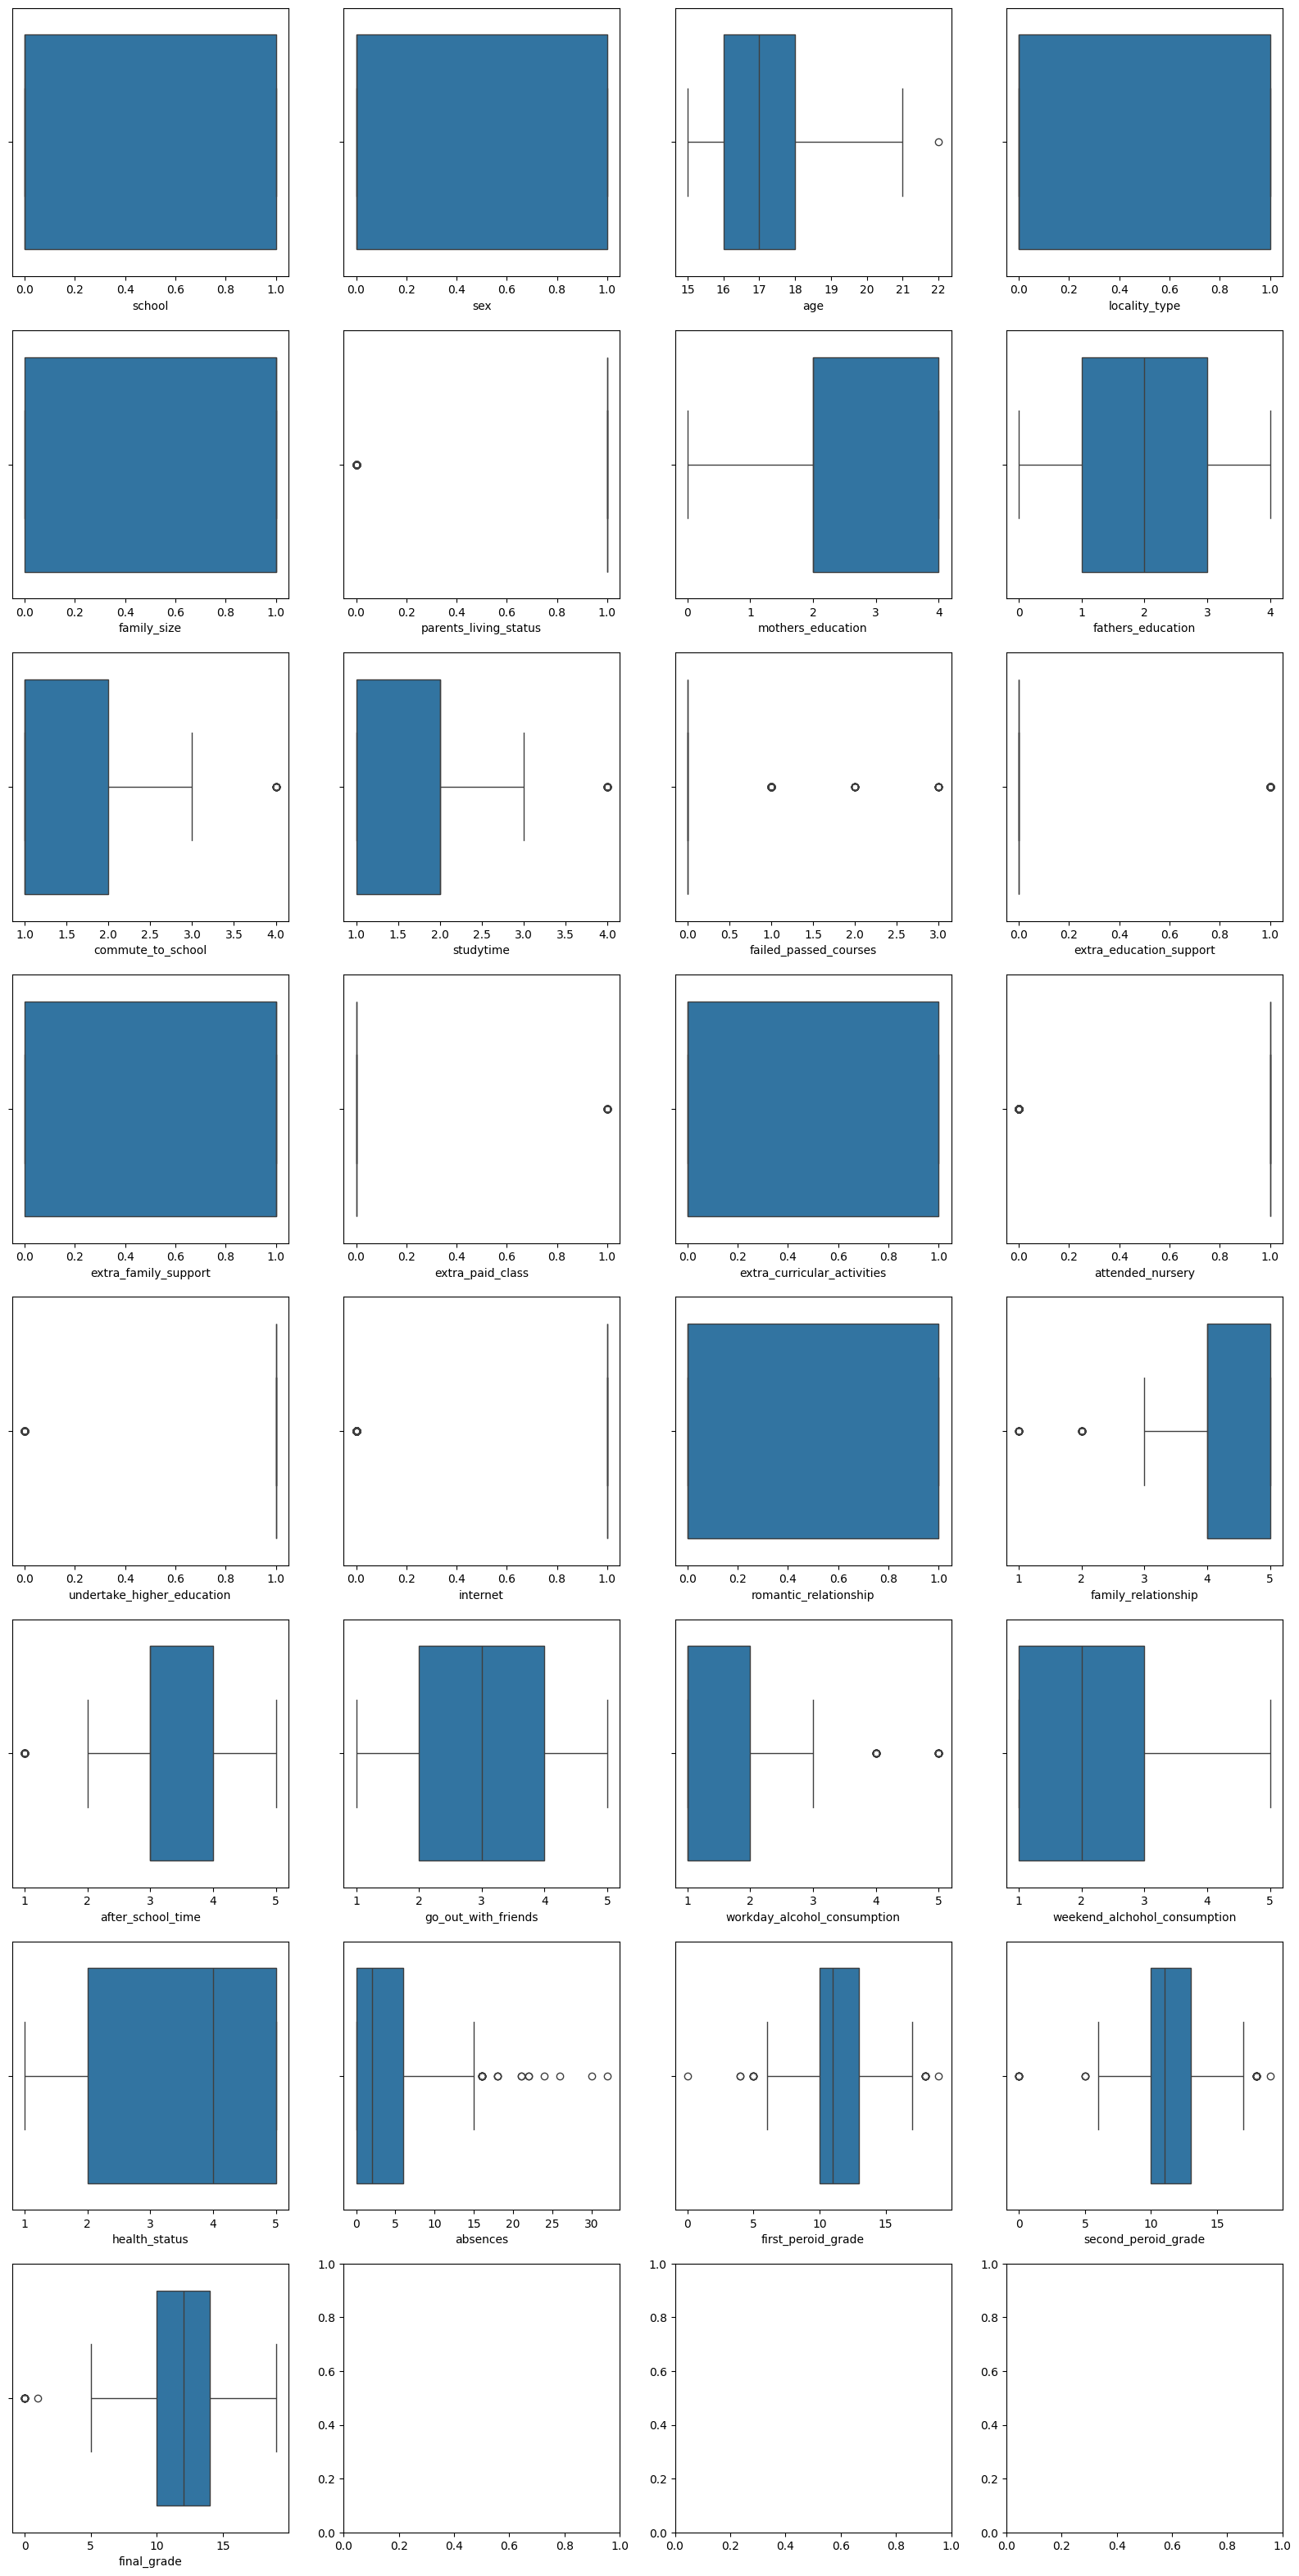

In [12]:
#Plots using histogram
print("="*40)
print("Box Plots for numerical values")
print("="*40)
fig, ax = plt.subplots((len(numerical_features) // 4) + 1,4, figsize=(20,40))
for i in range(len(numerical_features)):
  c_axes = ax.flat[i]
  sns.boxplot(data=data, x=numerical_features[i], ax=c_axes)


plt.show()

There were some outliers in numerical values such as age, commute to school and study time and others.
However, These outliers are cases that needs to be considered for development of the model

---

Scatter plot of how the numerical independent attributes relates to the target feature
Target features under considerations is the final grade

---


#### 

Scatter plots of features per final grade


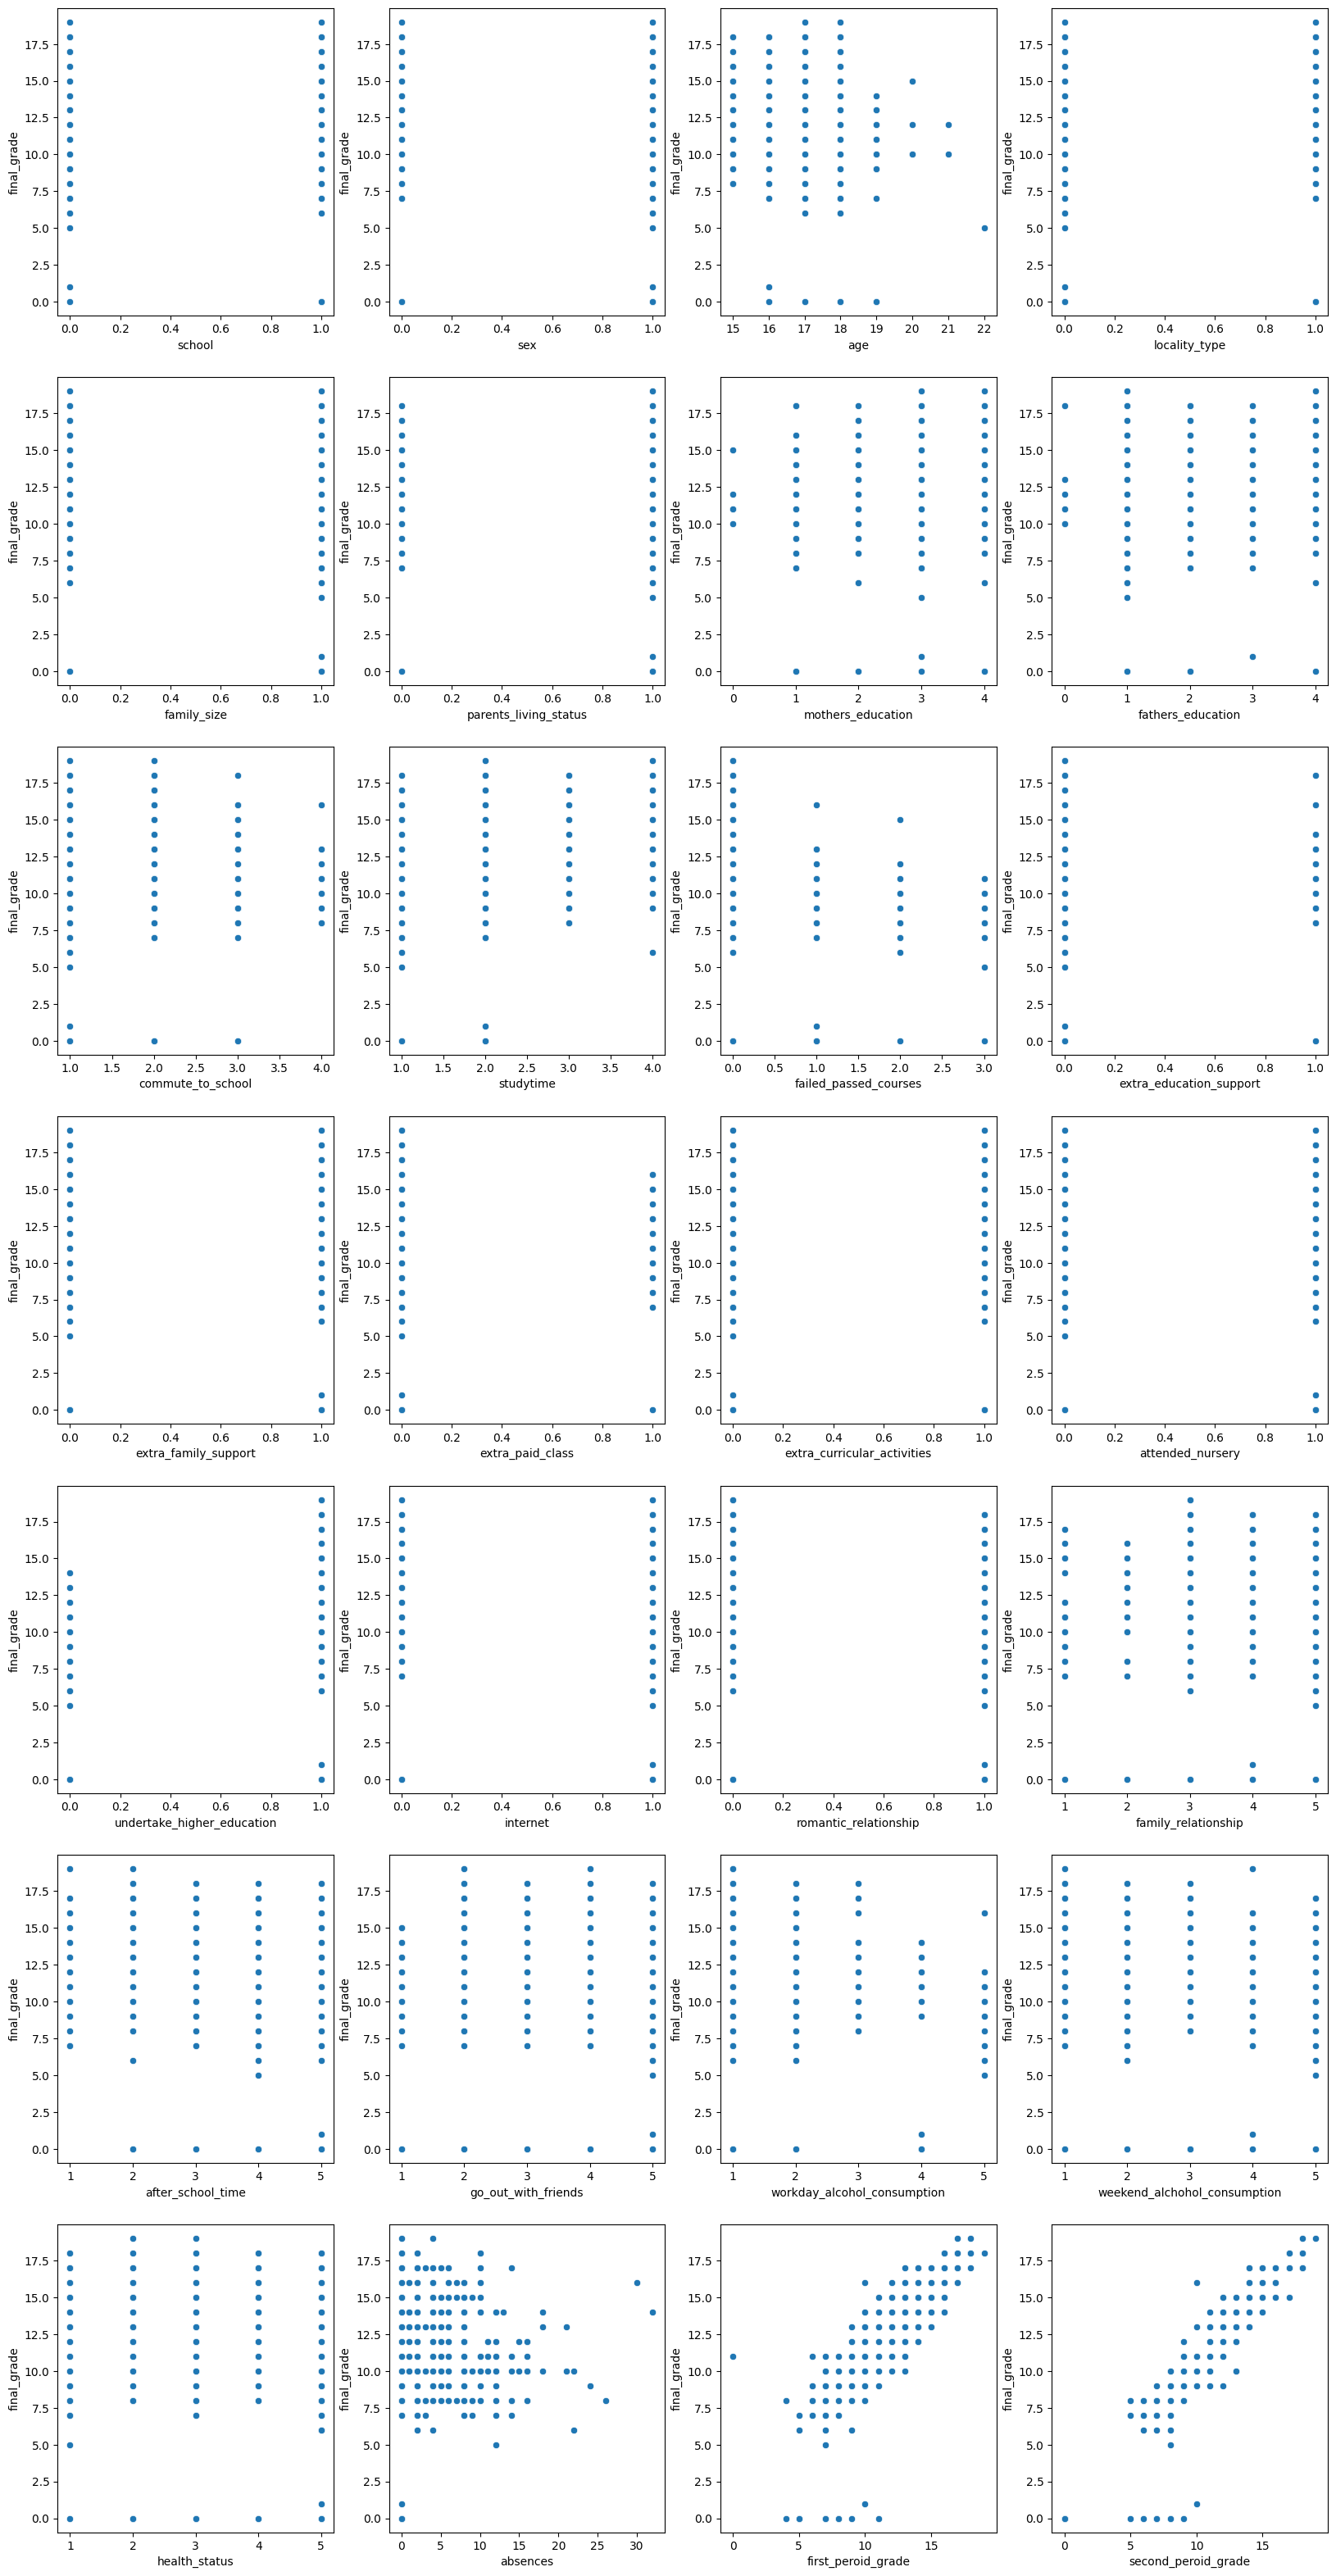

In [13]:
print("="*40)
print("Scatter plots of features per final grade")
print("="*40)

#Final Grade
second_list = numerical_features.copy() #creating a copy of the list of numerical features
second_list.remove('final_grade') #remove target attribute so as not to plot a scatter of the final grade by itself
fig, ax = plt.subplots((len(second_list) // 4),4, figsize=(20,40)) #creating a subplot of 4 columns to plot all features on one figure
for i in range(len(second_list)): #iterating over axes in the figure
  c_axes = ax.flat[i] #identifier for figure
  sns.scatterplot(data=data, x=second_list[i], y='final_grade', ax=c_axes) #plotting on the figure

plt.show()

---

Looking at the graph, first peroid grades and second peroid grades show possible multicolinearity and suggests that the first peroid and second peroid grades be dropped during feature engineering

---

Classifying final grade into pass or fail

Creating pass or fail class categories


,Figure,percentage
final_grade,,
1,549,84.59
0,100,15.41


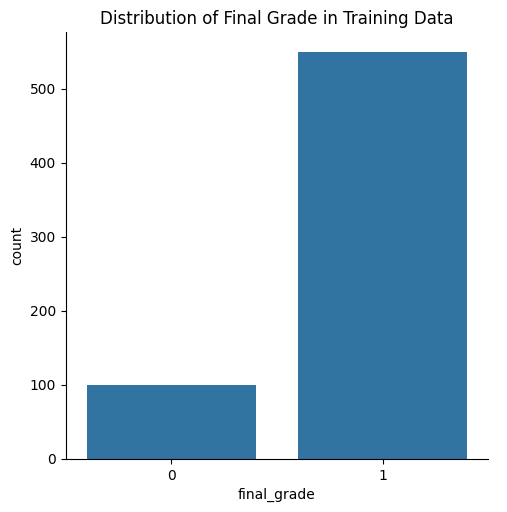

In [14]:
print("="*40)
print("Creating pass or fail class categories")
print("="*40)
#Classisfy Target into Pass or Fail
data['final_grade'] = data['final_grade'].apply(lambda x : transform_grade(x))

check_balance(data['final_grade'])

Target Variables Exhibit a highly imbalanced dataset

---

### Feature Engineering

---

Methods considered for feature selection included
- Correlation: This was chosen as the starting point of the feature engineering since it provides a faster and a lightweight method to quickly inspect how features are correlated in order to remove or merge correlated features
- Random Forest: This was chosen to provide a more robust and complimentary method of selecting features after the correlation analysis

---

1. Correlation 

In [15]:
print("="*40)
print("Generating Correlation Matrix")
print("="*40)

#Creating correlation matrix
correlation = data[numerical_features].corr().round(2)
display(correlation)

Generating Correlation Matrix


,school,sex,age,locality_type,family_size,parents_living_status,mothers_education,fathers_education,commute_to_school,studytime,failed_passed_courses,extra_education_support,extra_family_support,extra_paid_class,extra_curricular_activities,attended_nursery,undertake_higher_education,internet,romantic_relationship,family_relationship,after_school_time,go_out_with_friends,workday_alcohol_consumption,weekend_alchohol_consumption,health_status,absences,first_peroid_grade,second_peroid_grade,final_grade
school,1.00,-0.08,0.09,0.35,-0.02,0.03,-0.25,-0.21,0.25,-0.14,0.11,-0.12,-0.06,-0.01,-0.09,0.00,-0.14,-0.24,0.07,-0.03,0.03,0.04,0.05,0.01,-0.06,-0.16,-0.29,-0.27,-0.30
sex,-0.08,1.00,-0.04,-0.03,-0.10,0.06,0.12,0.08,0.04,-0.21,0.07,-0.11,-0.13,0.08,0.12,-0.04,-0.06,0.07,-0.11,0.08,0.15,0.06,0.28,0.32,0.14,0.02,-0.10,-0.10,-0.08
age,0.09,-0.04,1.00,0.03,0.00,-0.01,-0.11,-0.12,0.03,-0.01,0.32,-0.17,-0.10,-0.01,-0.05,-0.02,-0.27,0.01,0.18,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11
locality_type,0.35,-0.03,0.03,1.00,0.05,0.09,-0.19,-0.14,0.34,-0.06,0.06,-0.02,-0.01,0.03,0.01,-0.02,-0.08,-0.18,0.03,0.03,0.04,-0.02,0.05,0.01,-0.00,-0.07,-0.16,-0.15,-0.13
family_size,-0.02,-0.10,0.00,0.05,1.00,0.24,0.01,0.04,-0.01,0.01,0.07,0.06,0.04,0.05,0.01,-0.10,-0.00,-0.01,0.03,-0.00,0.02,0.00,-0.06,-0.08,-0.00,-0.00,-0.05,-0.04,-0.05
parents_living_status,0.03,0.06,-0.01,0.09,0.24,1.00,-0.06,-0.03,0.04,-0.01,-0.01,-0.01,0.01,0.02,0.10,-0.03,0.02,0.06,-0.05,0.05,0.04,0.03,0.04,0.07,0.01,-0.12,0.02,0.02,-0.00
mothers_education,-0.25,0.12,-0.11,-0.19,0.01,-0.06,1.00,0.65,-0.27,0.10,-0.17,-0.02,0.12,0.11,0.12,0.13,0.21,0.27,-0.03,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.14
fathers_education,-0.21,0.08,-0.12,-0.14,0.04,-0.03,0.65,1.00,-0.21,0.05,-0.17,0.02,0.14,0.09,0.08,0.07,0.19,0.18,-0.07,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.15
commute_to_school,0.25,0.04,0.03,0.34,-0.01,0.04,-0.27,-0.21,1.00,-0.06,0.10,-0.04,-0.04,-0.04,-0.03,-0.01,-0.07,-0.19,0.00,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.06
studytime,-0.14,-0.21,-0.01,-0.06,0.01,-0.01,0.10,0.05,-0.06,1.00,-0.15,0.09,0.14,-0.00,0.07,0.04,0.19,0.04,0.03,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.17


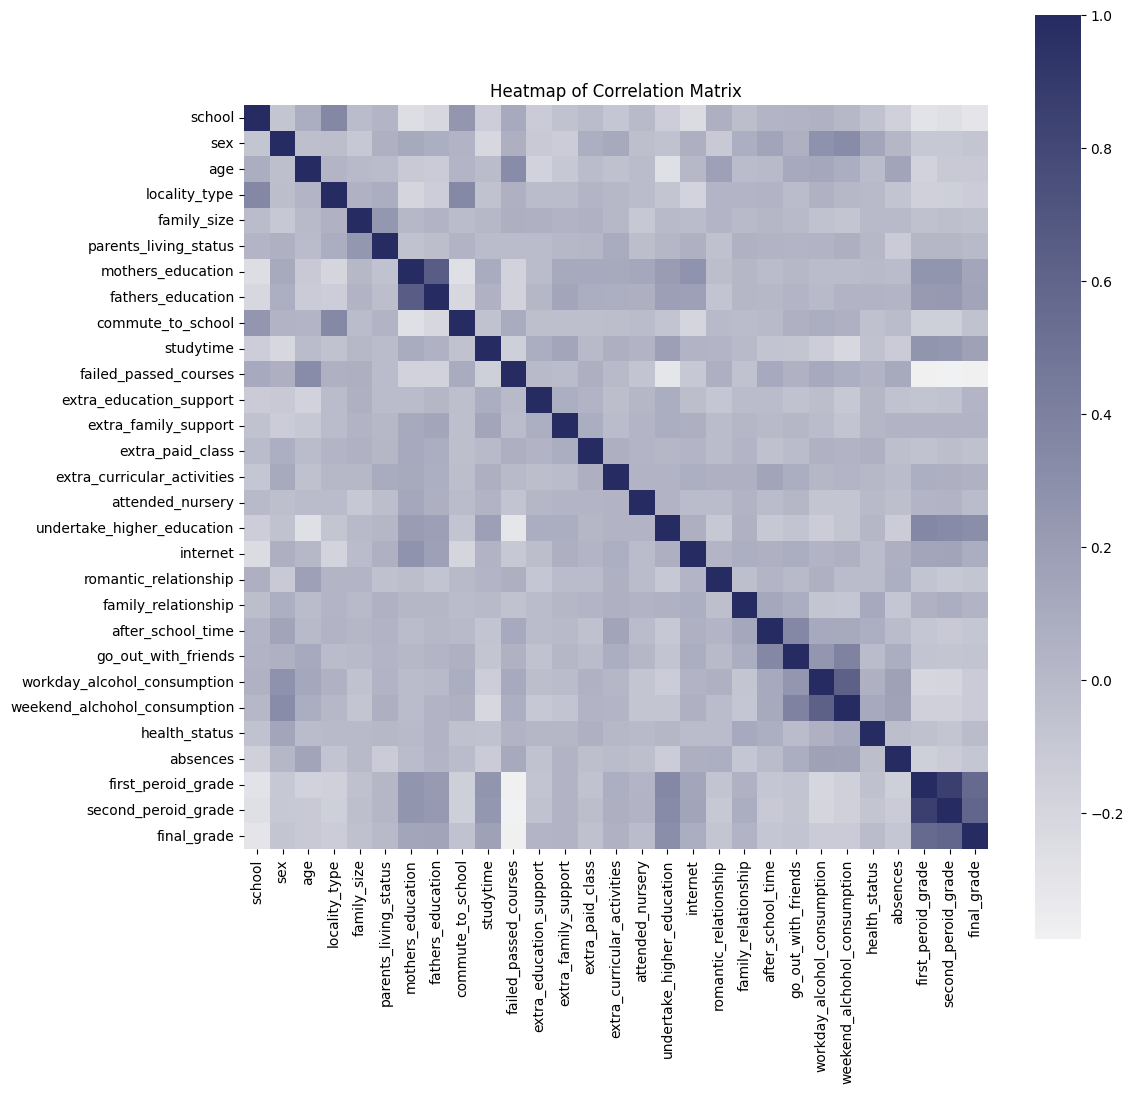

In [16]:
#Checking the correalation of numerical data
custom_color = sns.light_palette("#262C61", as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation, square=True, cmap=custom_color)
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [17]:
#Since first peroid grade and second peroid grade are highly correlated to the final peroid grade
#final_grade will be used as the target feature
data.drop(columns=['first_peroid_grade', 'second_peroid_grade'], inplace=True)

---

2. Random Forest


In [18]:
#Random Forest cleaning model building pipeline
print("="*40)
print("Random Forest Classification and Feature Selection Pipeline Creation")
print("="*40)
print('importing Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier

#Creating ordinal encoding Transformer
print("Creating transformer for encoding non binary categorical data")
ordinal_encoder = OrdinalEncoder() #This does not pose a situation for non ordinal categories since trees are not distance based

print('Updating List of Categorical Feautures')
categorical_features =list(data.select_dtypes(include=['object', 'str']).columns)
#since dataset contains categorical data and numerical features 
#column transformer is used to encode only categorical data
preprocessor = ColumnTransformer(
    transformers = [('cat', ordinal_encoder, categorical_features)],
    remainder='passthrough', verbose_feature_names_out=False
)

print('Creating preprocessor and classification pipeline')
random_forest_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('random forest classifier', RandomForestClassifier(n_estimators=100,
                                    random_state = 42 )
    )
])

Random Forest Classification and Feature Selection Pipeline Creation
importing Random Forest Classifier
Creating transformer for encoding non binary categorical data
Updating List of Categorical Feautures
Creating preprocessor and classification pipeline


Preparing data for random forest
creating list of dependent and independent features
Splitting into Training and Testing Data

Preview Dataset


,Figure,percentage
final_grade,,
1,439,84.59
0,80,15.41


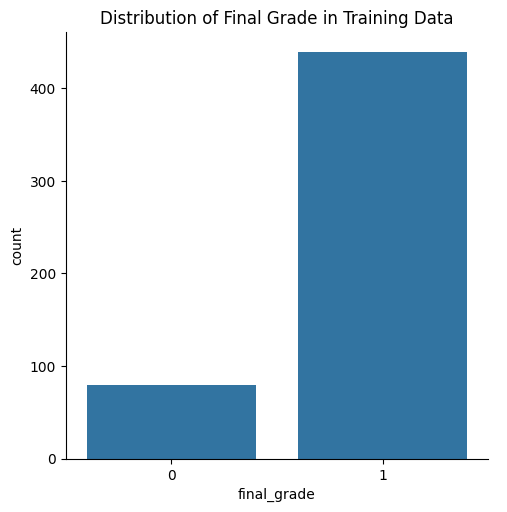

In [19]:
print("="*40)
print("Preparing data for random forest")
print("="*40)

#Creating list of target and independent features
print('creating list of dependent and independent features')
target_feature = data['final_grade']
independent_features = data.drop(columns=['final_grade'])

#Splitting dataset into 80-20 split with the same proportion of 
# imbalance in the target feature by passing target to stratify condition
print('Splitting into Training and Testing Data\n')
x_train, x_test, y_train, y_test = train_test_split(
    independent_features,
    target_feature,
    test_size=0.2,
    random_state=43,
    stratify=target_feature)

#Preview target feature in training dataset
print("="*40)
print("Preview Dataset")
print("="*40)
check_balance(y_train)

In [27]:
print("="*40)
print("Peforming Random Forest")
print("="*40)

#Executing pipeline
print('Executing random forest')
random_forest_pipeline.fit(x_train, y_train)

#Evaluation random forest
y_predictors = random_forest_pipeline.predict(x_test)
print('Classification report')
display(get_report(y_test, y_predictors))

print("Extracting important features")
#Get feature name
feature_names = preprocessor.get_feature_names_out() #Get feature names from ordinal classifier model
#get Importance 
randomForestModel = random_forest_pipeline.named_steps['random forest classifier'] # Random forest model created by pipeline
importance_values = 100 * randomForestModel.feature_importances_ #feature importance multiplied by 100 to get it in percentage score
#append results in dataframe for easy presentation
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importance_values
}).sort_values(by='Importance (%)', ascending=False)

#View Importance
display(feature_importance)


Peforming Random Forest
Executing random forest
Classification report


,precision,recall,f1-score,support
Fail,0.714286,0.250000,0.370370,20.000000
Pass,0.878049,0.981818,0.927039,110.000000
accuracy,0.869231,0.869231,0.869231,0.869231
macro avg,0.796167,0.615909,0.648704,130.000000
weighted avg,0.852854,0.869231,0.841397,130.000000


Extracting important features


,Feature,Importance (%)
14,failed_passed_courses,10.512983
29,absences,6.969785
20,undertake_higher_education,5.634799
24,after_school_time,5.072901
4,school,4.886026
25,go_out_with_friends,4.799562
23,family_relationship,4.600857
6,age,4.280669
11,fathers_education,3.937951
27,weekend_alchohol_consumption,3.858290


<Axes: xlabel='Importance (%)', ylabel='Feature'>

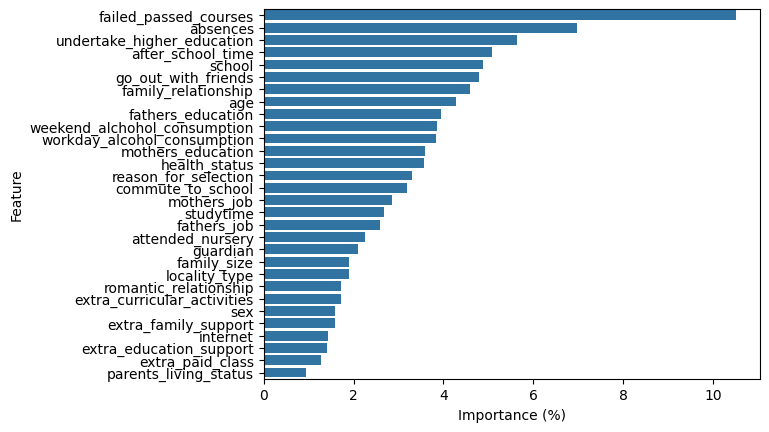

In [ ]:
sns.barplot(data=feature_importance, x='Importance (%)', y='Feature')
plt.show()

The correlation analysis revealed high correlation between first period grade and second peroid grade to final grade. and moderate correlation among the other features. this was expected since the first peroid and second peroid grade contribute to the final grade of students

## Classify final grade to fail or pass

Target features is imbalance there we will consider an oversampling and hybrid approach and then compare the the 2 models

Splitting of Dataset into training data and testing data.
The split will ensure that training data will contain a proportional value from both the majority and minority classes.
Afterwards the training data will be preprocessed further by balancing the data and normalising the data to a standard scale

In [ ]:
#Spliting of dataset into training and testing data
target_feature = data['final_grade']
independent_features = data.drop(columns=['final_grade'])
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_features, target_feature, test_size=0.2, random_state=43, stratify=target_feature)
check_balance(y_train)

## Furter preprocessing of training data

In [ ]:
#One Hot encoding
#Since training dataset contains both categorical and numerical data we
#leverage on the column transformer class to perform one hot encoding for only
#the categorical features

In [ ]:
#update_categorical and numerical features list
categorical_features =list(X_train.select_dtypes(include='object').columns)
numerical_features = list(X_train.select_dtypes(include='number').columns)

#Creating pipeline for onehotencoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
#Creating pipeline for Standard Scalar
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [('cat', encoder, categorical_features),
                    ('num', scaler, numerical_features)],
    remainder='passthrough', verbose_feature_names_out=False
)

In [ ]:
#Perform the encoding
X_train_processed = preprocessor.fit_transform(X_train)

#Scaling Test set with the fiting from the training data
X_test_processed = preprocessor.transform(X_test)

#convert the returned numpy array to a dataframe
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())


# Balancing with Oversampling
The Dataset has relatively fewer instances therefore we would consider oversampling techniques



In [28]:
from imblearn.over_sampling import SMOTE, ADASYN

## Smote Oversampling

In [29]:
#Create SMOTE Oversmapling class
minority_balance = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

In [30]:
#Create Traning Sample
X_train_smote, y_train_smote = minority_balance.fit_resample(X_train_processed, y_train)

NameError: name 'X_train_processed' is not defined

In [31]:
check_balance(y_train_smote)

NameError: name 'y_train_smote' is not defined

## Balancing with ADASYN

In [ ]:
#Creating ADASYN Balancing class
adasyn_balance = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)

In [ ]:
#Balancing training data
x_train_adasyn, y_train_adasyn = adasyn_balance.fit_resample(X_train_processed, y_train)
check_balance(y_train_adasyn)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logistic regression model
model = LogisticRegression()

In [ ]:
#Imbalanced data
model.fit(X_train_processed, y_train)
imbalanced_data_predictions = model.predict(X_test_processed)

In [ ]:
#SMOTE Oversmapling
model.fit(X_train_smote, y_train_smote)
smote_predictions = model.predict(X_test_processed)

In [ ]:
#ADASYN Oversampling
model.fit(x_train_adasyn, y_train_adasyn)
adasyn_predictions = model.predict(X_test_processed)

#Evaluating Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### ACCURACY SCORE

In [ ]:
#Accuracy Score
imbalanced_accuracy = round(100 * accuracy_score(y_test, imbalanced_data_predictions),2)
smote_accuracy = round(100 * accuracy_score(y_test, smote_predictions),2)
adasyn_accuracy = round(100 * accuracy_score(y_test, adasyn_predictions),2)
print(f"Imbalanced Data Accuracy: {imbalanced_accuracy}")
print(f"SMOTE Accuracy: {smote_accuracy}%")
print(f"ADASYN Accuracy: {adasyn_accuracy}%")

### Recall, Precision and F1-Score

In [ ]:
#Get reports
columns = ['precision', 'recall', 'f1-score']
imbalanced_report = pd.DataFrame(classification_report(y_test, imbalanced_data_predictions, output_dict=True,target_names=["Fail", "Pass"])).transpose()
smote_report = pd.DataFrame(classification_report(y_test, smote_predictions, output_dict=True,target_names=["Fail", "Pass"])).transpose()
adasyn_report = pd.DataFrame(classification_report(y_test, adasyn_predictions, output_dict=True,target_names=["Fail", "Pass"])).transpose()

for i in columns:
  imbalanced_report[i] = (100*imbalanced_report[i]).round(2)
  smote_report[i] = (100*smote_report[i]).round(2)
  adasyn_report[i] = (100*adasyn_report[i]).round(2)

#Print Results
print("Imabalanced \n " + "*" * 50)
display(imbalanced_report)
print("*" * 15)
print("SMOTE Report \n " + "*" * 50)
display(smote_report)
print("*" * 15)
print("ADASYN Report \n " + "*" * 50)
display(adasyn_report)

### Confusion Matrix

In [ ]:
#Get Confusion Matrix
imbalanced_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, imbalanced_data_predictions))
smote_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, smote_predictions))
adasyn_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, adasyn_predictions))

#Display matrix
print("Imbalanced data Confusion Matrix \n " + "*" *25)
display(imbalanced_confusion_matrix)
print("*" * 15)
print("SMOTE Confusion Matrix \n " + "*" *25)
display(smote_confusion_matrix)
print("*" * 15)
print("ADASYN Confustion Matrix \n " + "*" * 25)
display(adasyn_confusion_matrix)